In [1]:
#   imports

from library import xy_from_dict_fn
from initialize import Experiment
from metrics import Bins, Entropy
from figures import PlotLine


In [2]:
#   global variable declaration

colors = ['sienna', 'tomato', 'orange', 'darkgoldenrod', 'limegreen', 
          'yellowgreen', 'teal', 'deepskyblue', 'royalblue', 'slateblue', 
          'darkviolet', 'orchid', 'hotpink']
experiment_number = 20230404


In [3]:
#   initialize

experiment = Experiment(20230404)
experiment_gfp_bins = Bins(experiment.gfp_pop_dict)
well_gfp_bins = Bins(experiment.all_well_gfp_pop_dict)
experiment_entropy = Entropy(experiment.gfp_pop_dict, 
                             experiment_gfp_bins.bin_edges)
well_entropy_dict = {}
for well_id in experiment.well_dict:
    well = experiment.well_dict[well_id]
    well_entropy_dict[well_id] = Entropy(well.gfp_pop_dict, 
                                         well_gfp_bins.bin_edges)


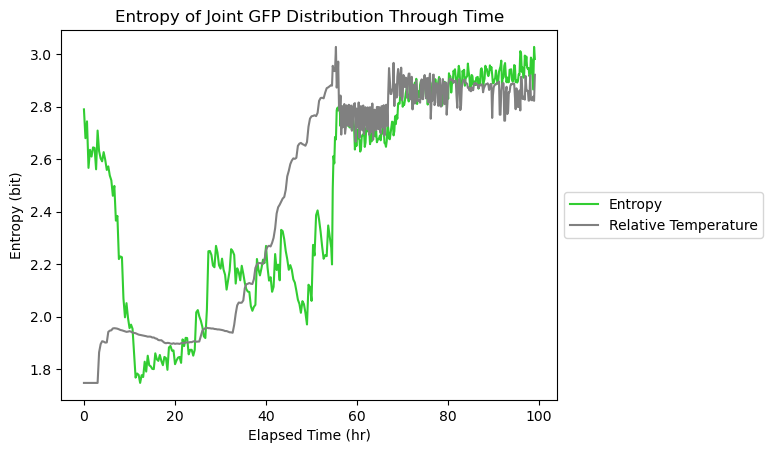

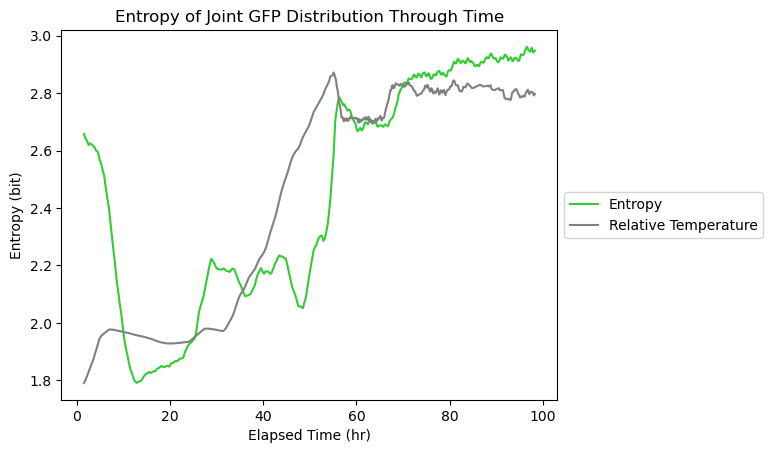

In [4]:
#   plot entropy of gfp joint distribution as a function of time

x, y = xy_from_dict_fn(experiment_entropy.entropy_dict)
x = [experiment.elapsed_dict[t] for t in x]
temp_x, temp_y = xy_from_dict_fn(experiment.temp_dict)
temp_x = [experiment.elapsed_dict[t] for t in temp_x]

for avg in (1, 10):
    plot = PlotLine([x], [y], avg=avg, label_list=['Entropy'], 
                    color_list=['limegreen'], temp_x=temp_x, temp_y=temp_y, 
                    temp_avg=avg, temp_label='Relative Temperature', 
                    title='Entropy of Joint GFP Distribution Through Time', 
                    xlabel='Elapsed Time (hr)', ylabel='Entropy (bit)', 
                    save=f'entropy_figures/gfp_joint_entropy_avg_{avg}.png') 
    plot.show()
    

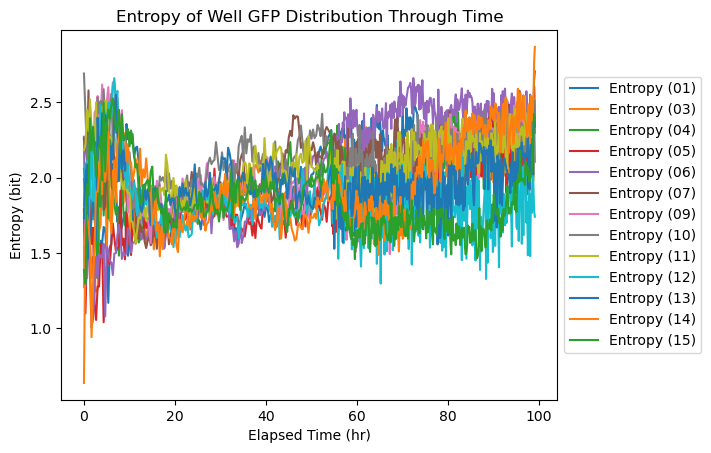

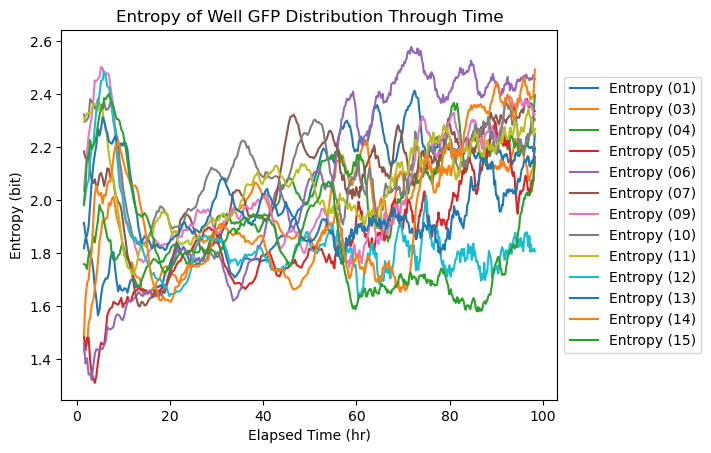

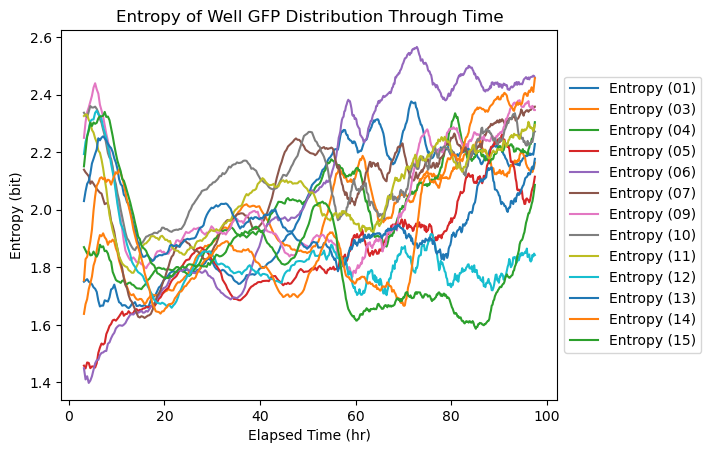

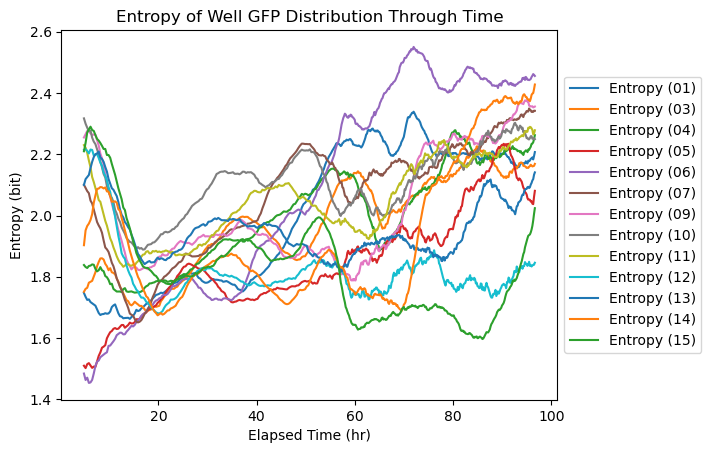

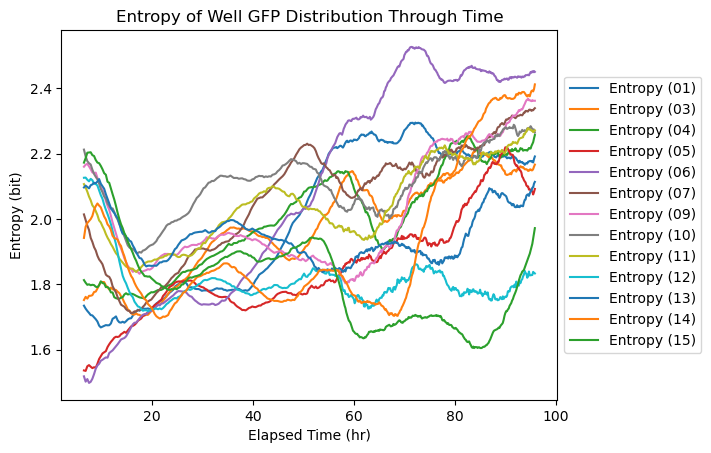

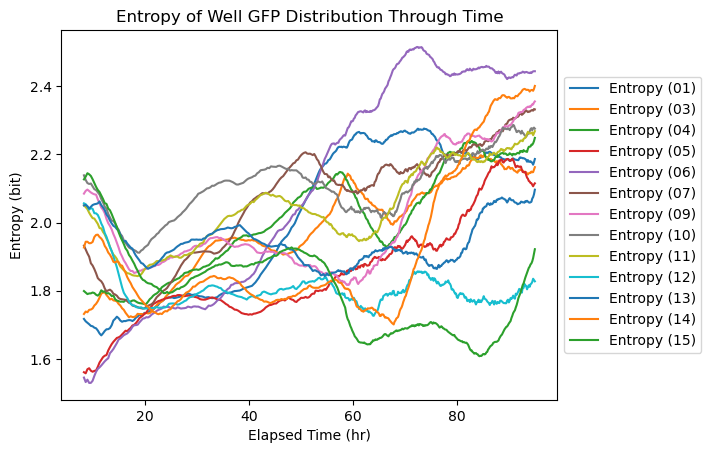

In [14]:
#   plot entropy of each well's gfp distribution as a function of time

x_list = []
y_list = []
for well_id in experiment.well_id_list:
    x, y = xy_from_dict_fn(well_entropy_dict[well_id].entropy_dict)
    x = [experiment.elapsed_dict[t] for t in x]
    x_list.append(x)
    y_list.append(y)

for avg in (1, 10, 20, 30, 40, 50):
    plot = PlotLine(x_list, y_list, avg=avg, 
                    label_list=[f'Entropy ({w})' 
                                for w in experiment.well_id_list], 
                    color_list=experiment.colors, 
                    title='Entropy of Well GFP Distribution Through Time', 
                    xlabel='Elapsed Time (hr)', ylabel='Entropy (bit)', 
                    save=f'entropy_figures/gfp_all_well_entropy_avg_{avg}.png') 
    plot.show()
